Leitura do arquvio .csv, contendo os fatores de emissão.

In [14]:
import pandas as pd #Importa a biblioteca pandas as pd
import os           #Importa a biblioteca os

cwd = os.getcwd()   # cwd recebe o endereço do script

path = cwd+'\\tabelas\\FE'      #path recebe o endereço onde está o arquivo do fatores de emissão
print(path)                     #imprime o path para verificação

chapterNumer = 11
subChapter = 7
file = 'chpt_'+str(chapterNumer)+'_'+str(subChapter)+'.csv'  #file recebe path + o nome do arquivo
print(file)                       

fe = pd.read_csv(path+'\\'+file, delimiter = ';')            #fe recebe o arquivo csv
print(fe)

C:\Guilherme\ControleP\ENS410064\venv\Scripts\tabelas\FE
chpt_11_7.csv
         Source      PM    SO2   NOX
0           BMP  0.0600    NaN   NaN
1       Secador  1.1500    NaN   NaN
2    Resfriador  0.0550    NaN   NaN
3    Granulacao  0.0950    NaN   NaN
4        Queima  0.2450  104.5  0.27
5  Refrigeracao  0.0335    NaN   NaN
6     Esmatacao  0.0950    NaN   NaN


Função para leitura dos fatores de emissão e estimar a emissão

In [50]:
import matplotlib.pyplot as plt
import numpy as np

def verificacao_emissao (fe, atv):
    
    df_emissao = fe.set_index('Source').mul(df['producao_diaria'], axis=0)
    
    fig,ax = plt.subplots(len(fe.columns)-1,1,sharex = True, figsize = (9,15))
    for ii in range(1,len(fe.columns)): #  Este loop for itera sobre os números de 1 até o número de COLUNAS em fe (len(fe.columns)). O uso de range(1, len(fe.columns)) exclui a primeira coluna
        ax[ii-1].bar(fe['Source'],fe.iloc[:,ii],color = ['#DAF7A6','red','cyan', 'green', 'blue', 'magenta','purple'])
        ax[ii-1].set_xlabel('Processo', fontsize=12) #fontsize=8 é um argumento usado para definir o tamanho da fonte
        ax[ii-1].set_ylabel(fe.columns[ii]+'\n(kg/ton)', fontsize=12)

    print(df_emissao)


Criar sazonalidade e método monte carlo para estimar a produção em 1 ano (2023)

2023-01-01 00:00:00    0.377117
2023-01-01 01:00:00    0.116789
2023-01-01 02:00:00    0.053346
2023-01-01 03:00:00    0.373443
2023-01-01 04:00:00    0.251767
                         ...   
2023-12-30 20:00:00    0.178447
2023-12-30 21:00:00    0.176870
2023-12-30 22:00:00    0.198564
2023-12-30 23:00:00    0.182797
2023-12-31 00:00:00    0.118277
Freq: h, Name: producao_diaria, Length: 8737, dtype: float64


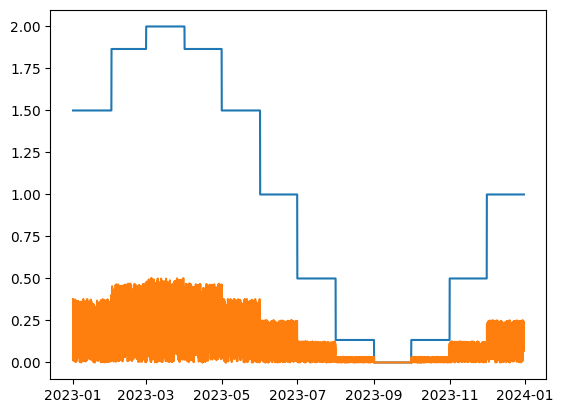

In [57]:
#criando o dataframe contendo todas as horas de 2023
i = pd.date_range(start='2023-01-01', end='2023-12-31', freq ='h') #cria um indice contendo todas as horas e dias do ano de 2023
df = pd.DataFrame(index = i) # cria um dataframe sendo que as linhas são as horas do ano

#Modelar, utilizando um conjunto de de funções sen e cos, a sazonalidade nos meses do ano.

df['sazonalidade'] = (np.sin(2* np.pi * df.index.month / 12)) + 1

#aplicando o método de monte carlo utilizando a biblioteca numpy

min_producao_hora = 0
max_producao_hora = 0.252083 # produção máxima possível em uma hora.

variabilidade = np.random.uniform(min_producao_hora, max_producao_hora, len(df))

df['variabilidade'] = variabilidade
df['producao_diaria'] = df['sazonalidade']*df['variabilidade']

print(df['producao_diaria'])

plt.plot(df['sazonalidade'])
plt.plot(df['producao_diaria'])



                     PM  SO2  NOX
2023-01-01 00:00:00 NaN  NaN  NaN
2023-01-01 01:00:00 NaN  NaN  NaN
2023-01-01 02:00:00 NaN  NaN  NaN
2023-01-01 03:00:00 NaN  NaN  NaN
2023-01-01 04:00:00 NaN  NaN  NaN
...                  ..  ...  ...
Granulacao          NaN  NaN  NaN
Queima              NaN  NaN  NaN
Refrigeracao        NaN  NaN  NaN
Resfriador          NaN  NaN  NaN
Secador             NaN  NaN  NaN

[8744 rows x 3 columns]


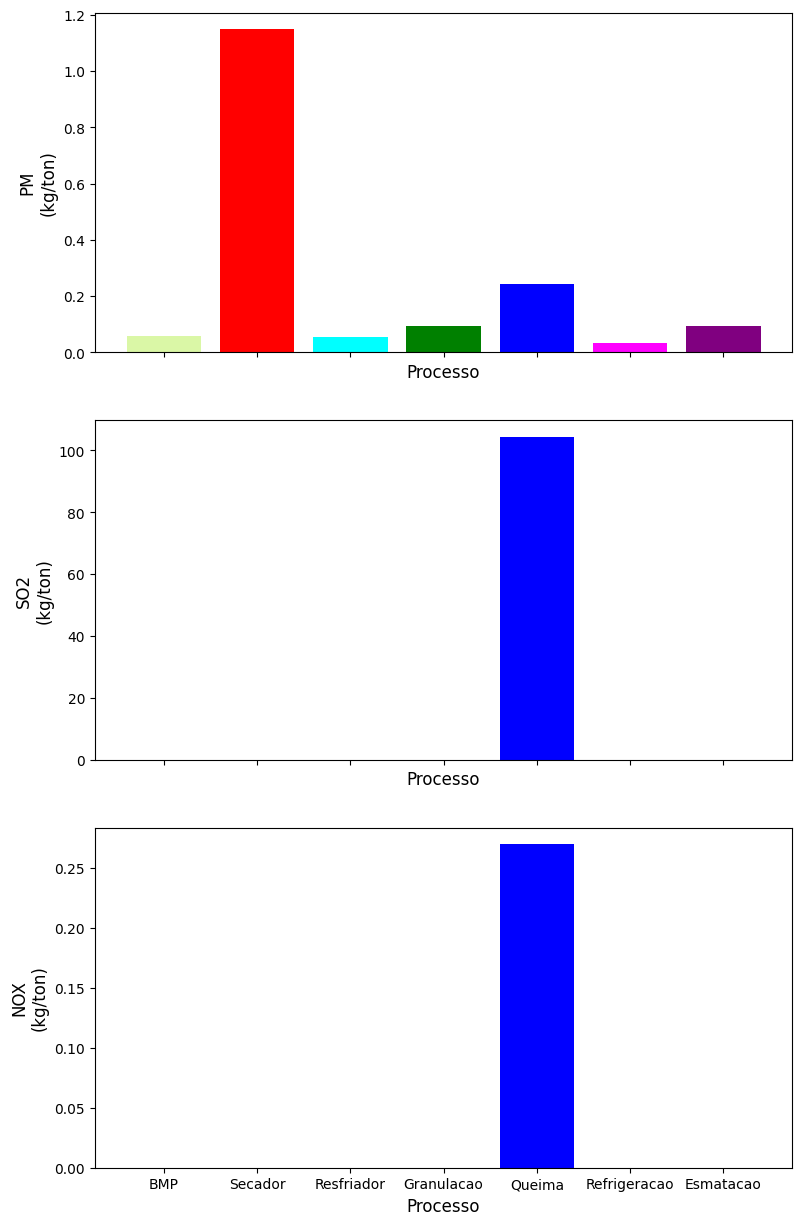

In [52]:
verificacao_emissao(fe, df)